<a href="https://colab.research.google.com/github/davidproton4u/AI-sampleassng/blob/main/Project_on_House_pricing_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries necessary for this project
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Dense, Activation, Input
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
ls

custom_house.xlsx  HousePxDSFP.xlsx  sample_data/


In [3]:
# Load the Ghana housing dataset
df = pd.read_excel('./HousePxDSFP.xlsx')

In [4]:
# Displaying the first 22 datasets from the entire data
df.head(22)

,Lctregn,Area,SqFt,Bdrms,Bthrms,Condition,YearBuilt,SalePrice
0,Greater Accra,East Legon,1800,3,2,Excellent,2002,650000
1,Greater Accra,Labone,800,2,2,Good,1998,410000
2,Greater Accra,Nungua,800,2,2,Good,1997,220000
3,Greater Accra,Madina,1250,3,2,Fair,1995,250000
4,Greater Accra,Cantoments,2500,4,3,Excellent,2003,720000
5,Greater Accra,Airport Residential,2800,4,4,Excellent,2021,780000
6,Greater Accra,East Legon,2750,4,4,Excellent,2000,810000
7,Greater Accra,Spintex,1250,3,3,Good,1997,650000
8,Greater Accra,Manet,2800,4,3,Excellent,2021,680000
9,Greater Accra,Osu,1800,3,2,Fair,1995,180000


In [5]:
# Displaying the last 22 datasets from the entire data
df.tail(22)

,Lctregn,Area,SqFt,Bdrms,Bthrms,Condition,YearBuilt,SalePrice
178,Western,Wassa-Akropong,4000,6,5,Fair,1999,190000
179,Western North,Dadieso,2800,4,3,Good,1998,420000
180,Western North,Juaboso,1800,3,2,Fair,1994,190000
181,Western North,Sefwi-Wiaso,1250,4,2,Good,1998,520000
182,Western North,Bibiani,1750,4,2,Good,1997,780000
183,Western North,Essam,3000,7,3,Good,1992,740000
184,Western North,Adabokrom,3200,8,4,Excellent,2021,830000
185,Western North,Enchi,1850,3,1,Excellent,2000,520000
186,Western North,Sefwi-Akontombra,1250,2,2,Excellent,2022,610000
187,Western North,Juaboso,800,3,2,Good,2001,320000


In [6]:
# Checking the Dataset for missing values
df.isna().sum()

Lctregn      0
Area         0
SqFt         0
Bdrms        0
Bthrms       0
Condition    0
YearBuilt    0
SalePrice    0
dtype: int64

In [7]:
# Checking the Data frame for missing values set in the column and row
df.isna()

,Lctregn,Area,SqFt,Bdrms,Bthrms,Condition,YearBuilt,SalePrice
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
195,False,False,False,False,False,False,False,False
196,False,False,False,False,False,False,False,False
197,False,False,False,False,False,False,False,False
198,False,False,False,False,False,False,False,False


In [8]:
# Checking the information on the Dataset uploaded
# We identify the Datatypes used in this system and their value count

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Lctregn    200 non-null    object
 1   Area       200 non-null    object
 2   SqFt       200 non-null    int64 
 3   Bdrms      200 non-null    int64 
 4   Bthrms     200 non-null    int64 
 5   Condition  200 non-null    object
 6   YearBuilt  200 non-null    int64 
 7   SalePrice  200 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 12.6+ KB


In [9]:
df.describe()

,SqFt,Bdrms,Bthrms,YearBuilt,SalePrice
count,200.000000,200.000000,200.000000,200.000000,2.000000e+02
mean,2619.000000,3.855000,2.395000,2004.870000,5.491000e+05
std,1050.431354,1.131537,1.021859,9.562968,2.334323e+05
min,800.000000,2.000000,1.000000,1986.000000,1.300000e+05
25%,1800.000000,3.000000,2.000000,1999.000000,3.725000e+05
50%,2800.000000,4.000000,2.000000,2001.000000,5.200000e+05
75%,3600.000000,4.000000,3.000000,2009.000000,7.450000e+05
max,4200.000000,8.000000,6.000000,2023.000000,1.230000e+06


In [10]:
# Displays the statistical numerical values of the Year the houses were built
df['YearBuilt'].value_counts()

2000    27
1999    18
1998    16
1997    15
2021    15
2002    12
2023    11
2001    11
2005     9
2009     8
2020     7
2003     7
2008     6
2004     6
2022     4
1992     4
1995     4
2019     3
1990     3
2016     2
1994     2
2006     2
2017     2
1993     1
2018     1
1986     1
1988     1
1987     1
2015     1
Name: YearBuilt, dtype: int64

In [11]:
df['Area'].value_counts()

Kintampo    4
Berekum     3
Adantia     3
Sunyani     3
Techiman    3
           ..
Kibi        1
Jejeti      1
Osiem       1
Atibie      1
Tumu        1
Name: Area, Length: 170, dtype: int64

In [12]:
df['Lctregn'].value_counts()

Greater Accra    30
Ashanti          30
Eastern          30
Brong Ahafo      30
Central          20
Volta            11
Western North    11
Upper East       10
Upper West       10
Bono East         9
Western           9
Name: Lctregn, dtype: int64

In [13]:
df['SqFt'].value_counts()

1800    36
2800    24
3600    21
3800    19
4000    19
800     13
1250    12
1850    10
3200    10
4200     8
2000     6
1200     5
2200     5
1750     4
3000     4
2750     2
2500     2
Name: SqFt, dtype: int64

In [14]:
df['Condition'].value_counts()

Good         104
Excellent     64
Fair          32
Name: Condition, dtype: int64

In [15]:
df['SalePrice'].value_counts()

420000     18
780000     17
320000     15
650000      9
520000      8
230000      7
450000      7
620000      7
540000      7
500000      6
850000      6
550000      6
720000      6
220000      6
980000      5
740000      5
950000      5
190000      5
830000      4
510000      3
920000      3
430000      3
180000      3
610000      2
300000      2
670000      2
330000      2
390000      2
810000      2
250000      2
640000      1
890000      1
440000      1
340000      1
350000      1
380000      1
560000      1
990000      1
820000      1
130000      1
680000      1
150000      1
790000      1
210000      1
200000      1
160000      1
700000      1
760000      1
900000      1
400000      1
410000      1
870000      1
280000      1
1230000     1
530000      1
Name: SalePrice, dtype: int64

In [16]:
df.groupby(['SalePrice']).sum()

<ipython-input-16-153aa227a48e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['SalePrice']).sum()


,SqFt,Bdrms,Bthrms,YearBuilt
SalePrice,,,,
130000,800,3,1,1990
150000,1800,3,2,1992
160000,800,2,1,2000
180000,5250,9,6,5994
190000,11150,17,12,10012
200000,1250,3,2,1997
210000,1850,3,2,1999
220000,12450,18,10,11997
230000,15800,23,12,14023


In [17]:
df.groupby(['Lctregn','SalePrice']).sum()

<ipython-input-17-99dd93fe178c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Lctregn','SalePrice']).sum()


SqFt  Bdrms  Bthrms  YearBuilt
Lctregn       SalePrice                                
Ashanti       220000     4400      6       2       4000
              230000     8200     13       6       8008
              280000     1800      3       1       2001
              300000     4650      6       2       3993
              320000     8000     10       3       3992
...                       ...    ...     ...        ...
Western North 520000     3100      7       3       3998
              610000     1250      2       2       2022
              740000     3000      7       3       1992
              780000     1750      4       2       1997
              830000     3200      8       4       2021

[151 rows x 4 columns]

In [18]:
df.groupby(['Lctregn','Area','SalePrice']).sum()

<ipython-input-18-7adcb5f0665e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Lctregn','Area','SalePrice']).sum()


SqFt  Bdrms  Bthrms  YearBuilt
Lctregn       Area             SalePrice                                
Ashanti       Agogo            230000      800      3       2       2001
              Antoa            220000      800      2       1       2002
              Asankare         980000     4200      6       2       2003
              Bantama          820000     2800      3       2       2019
                               1230000    3600      4       2       2018
...                                        ...    ...     ...        ...
Western North Essam            740000     3000      7       3       1992
              Juaboso          190000     1800      3       2       1994
                               320000      800      3       2       2001
              Sefwi-Akontombra 610000     1250      2       2       2022
              Sefwi-Wiaso      520000     1250      4       2       1998

[198 rows x 4 columns]

In [19]:
df.groupby(['Lctregn','Area','SalePrice','Condition','YearBuilt']).sum()

SqFt  Bdrms  \
Lctregn       Area             SalePrice Condition YearBuilt                
Ashanti       Agogo            230000    Good      2001        800      3   
              Antoa            220000    Good      2002        800      2   
              Asankare         980000    Good      2003       4200      6   
              Bantama          820000    Excellent 2019       2800      3   
                               1230000   Excellent 2018       3600      4   
...                                                            ...    ...   
Western North Essam            740000    Good      1992       3000      7   
              Juaboso          190000    Fair      1994       1800      3   
                               320000    Good      2001        800      3   
              Sefwi-Akontombra 610000    Excellent 2022       1250      2   
              Sefwi-Wiaso      520000    Good      1998       1250      4   

                                                              Bthrms  
Lctregn       Area             SalePrice Condition YearBuilt          
Ashanti       Agogo            230000    Good      2001            2  
              Antoa            220000    Good      2002            1  
              Asankare         980000    Good      2003            2  
              Bantama          820000    Excellent 2019            2  
                               1230000   Excellent 2018            2  
...                                                              ...  
Western North Essam            740000    Good      1992            3  
              Juaboso          190000    Fair      1994            2  
                               320000    Good      2001            2  
              Sefwi-Akontombra 610000    Excellent 2022            2  
              Sefwi-Wiaso      520000    Good      1998            2  

[200 rows x 3 columns]

<ipython-input-20-6b8ff6147484>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});


count    2.000000e+02
mean     5.491000e+05
std      2.334323e+05
min      1.300000e+05
25%      3.725000e+05
50%      5.200000e+05
75%      7.450000e+05
max      1.230000e+06
Name: SalePrice, dtype: float64


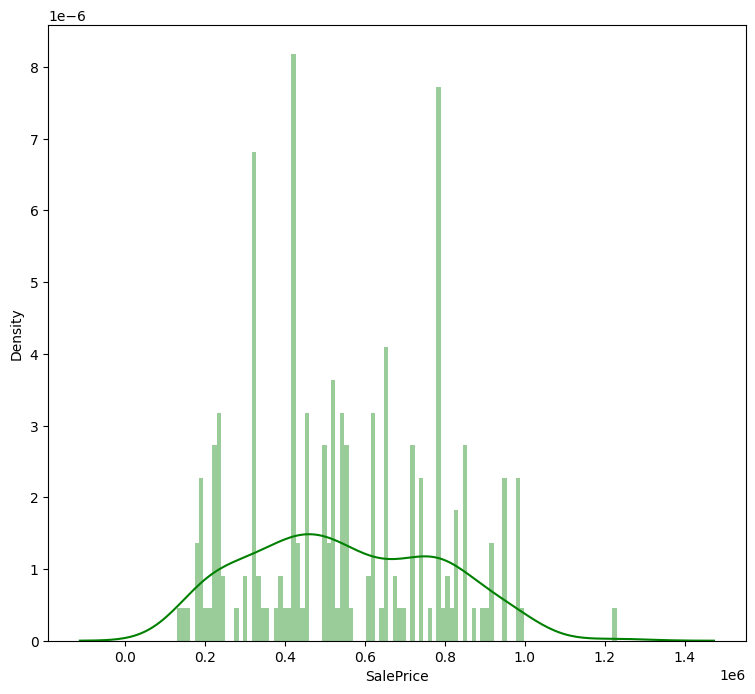

In [20]:
print(df['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

count     200.000000
mean     2004.870000
std         9.562968
min      1986.000000
25%      1999.000000
50%      2001.000000
75%      2009.000000
max      2023.000000
Name: YearBuilt, dtype: float64


<ipython-input-21-176fba3b2c23>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['YearBuilt'], color='b', bins=100, hist_kws={'alpha': 0.4});


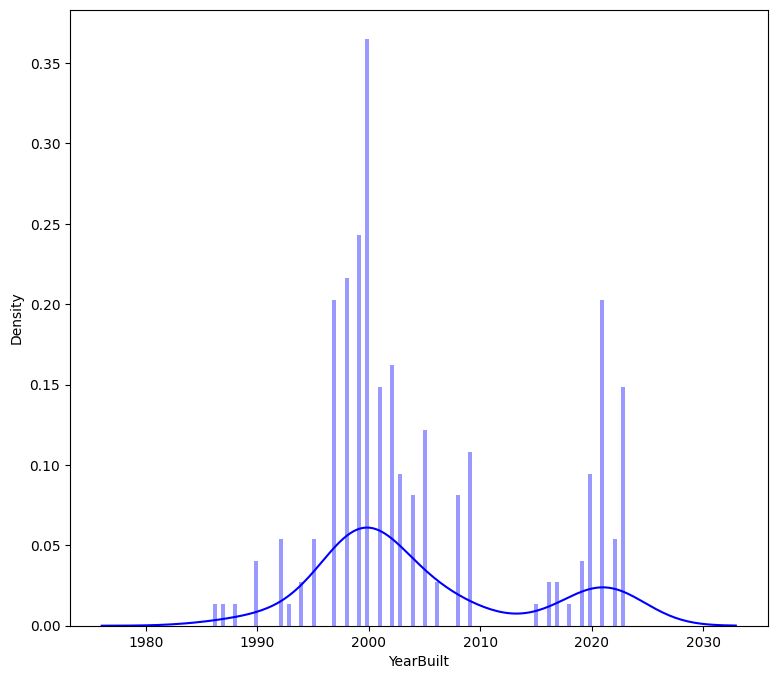

In [21]:
print(df['YearBuilt'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['YearBuilt'], color='b', bins=100, hist_kws={'alpha': 0.4});

array([[<Axes: title={'center': 'SqFt'}>,
        <Axes: title={'center': 'Bdrms'}>],
       [<Axes: title={'center': 'Bthrms'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'SalePrice'}>, <Axes: >]], dtype=object)

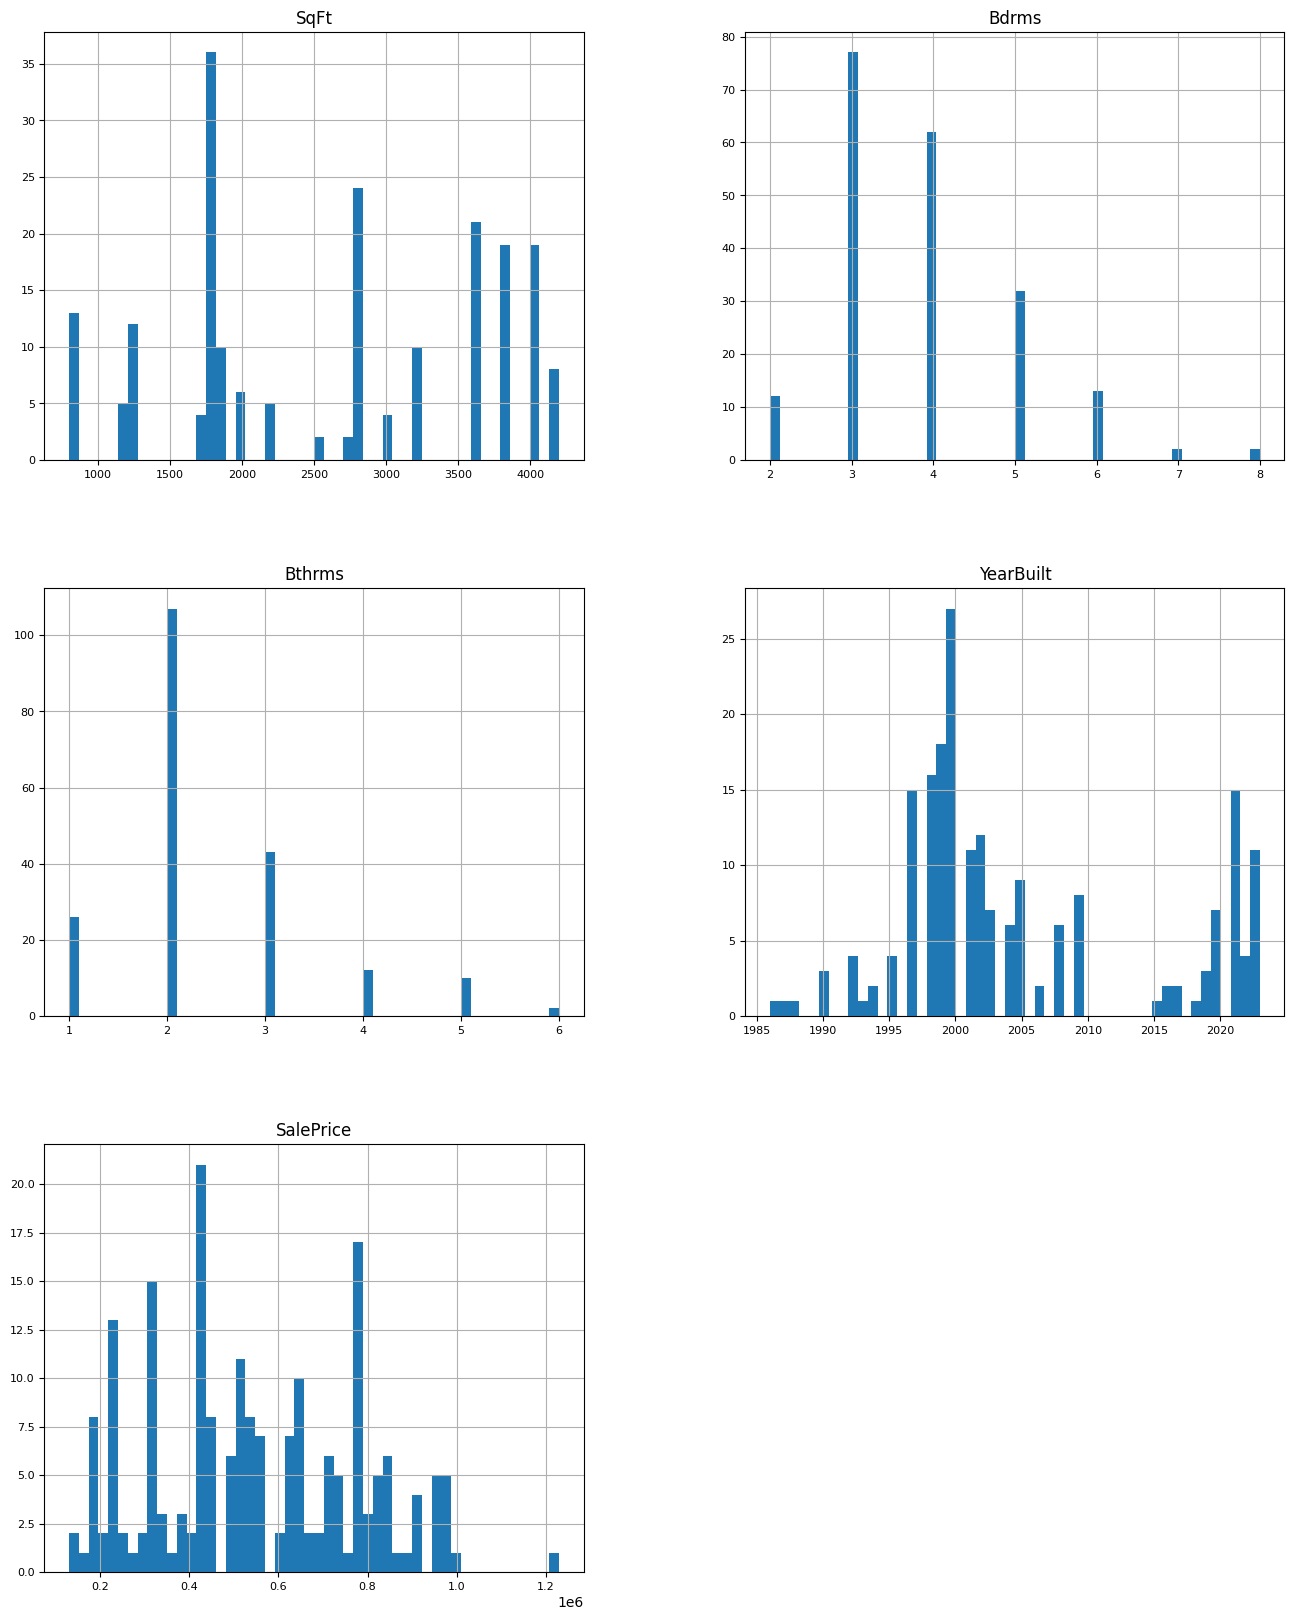

In [22]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [23]:
class MultiColumnEncoder:
    def __init__(self, categorical_cols=None, numerical_cols=None):
        self.categorical_cols = categorical_cols
        self.numerical_cols = numerical_cols
        self.encoders = {}
        self.scaler = None

    def fit_transform(self, X):
        if self.categorical_cols is None:
            self.categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
        if self.numerical_cols is None:
            self.numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

        # Categorical data encoding
        for col in self.categorical_cols:
            encoder = LabelEncoder()
            X[col] = encoder.fit_transform(X[col])
            self.encoders[col] = encoder

        # Numerical data scaling
        scaler = StandardScaler()
        X[self.numerical_cols] = scaler.fit_transform(X[self.numerical_cols])
        self.scaler = scaler

        return X

    def transform(self, X):
        for col, encoder in self.encoders.items():
            X[col] = encoder.transform(X[col])
        if self.scaler:
            X[self.numerical_cols] = self.scaler.transform(X[self.numerical_cols])
        return X

encoder = MultiColumnEncoder(categorical_cols=['Lctregn', 'Condition','Area'], numerical_cols=['SqFt', 'Bdrms','Bthrms','YearBuilt'])

encoded_data = encoder.fit_transform(df.drop('SalePrice', axis=1))
encoder_instance = encoder
encoded_df = encoded_data


In [24]:
X = encoded_df
y = df['SalePrice']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=0)

In [26]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_pred = linear_reg.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_pred)
linear_mae = mean_absolute_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)

# Random Forest Regression
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
rf_pred = rf_reg.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

# Support Vector Regression
svr_reg = SVR()
svr_reg.fit(X_train, y_train)
svr_pred = svr_reg.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_pred)
svr_mae = mean_absolute_error(y_test, svr_pred)
svr_r2 = r2_score(y_test, svr_pred)

**MSE:** A smaller MSE indicates a better fit to the data, and a value of 0 would mean a perfect prediction (perfect fit).

**R-squared **values range from 0 to 1, with 1 indicating a perfect fit to the data. A higher R-squared value suggests that the model is better at explaining the variance in the target variable.

In [27]:
print("Linear Regression:")
print("MSE:", linear_mse)
print("MAE:", linear_mae)
print("R-squared:", linear_r2)
print()

print("Random Forest Regression:")
print("MSE:", rf_mse)
print("MAE:", rf_mae)
print("R-squared:", rf_r2)
print()

print("Support Vector Regression:")
print("MSE:", svr_mse)
print("MAE:", svr_mae)
print("R-squared:", svr_r2)
print()

Linear Regression:
MSE: 38615901237.25559
MAE: 169022.02629663065
R-squared: 0.36518262513000954

Random Forest Regression:
MSE: 29218135000.0
MAE: 145055.0
R-squared: 0.519675077752628

Support Vector Regression:
MSE: 61324955562.48186
MAE: 211999.765728362
R-squared: -0.008137737482992735



In [28]:
model = Sequential()
model.add(Dense(50, activation=tf.nn.relu))
model.add(Dense(100, activation=tf.nn.relu))
model.add(Dense(1, activation=tf.keras.activations.linear))
model.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError(), metrics=["mse"])
model.fit(X_train, y_train, shuffle=True, batch_size=10, epochs=100, verbose=1)

Epoch 1/100
16/16 [==============================] - 1s 3ms/step - loss: 354561490944.0000 - mse: 354561490944.0000
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 354513715200.0000 - mse: 354513715200.0000
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 354451456000.0000 - mse: 354451456000.0000
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 354354462720.0000 - mse: 354354462720.0000
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 354201010176.0000 - mse: 354201010176.0000
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 353972846592.0000 - mse: 353972846592.0000
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 353645297664.0000 - mse: 353645297664.0000
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 353192148992.0000 - mse: 353192148992.0000
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss:

In [29]:
model_pred = model.predict(X_test)
model_mse = mean_squared_error(y_test, model_pred)
model_mae = mean_absolute_error(y_test, model_pred)
model_r2 = r2_score(y_test, model_pred)

2/2 [==============================] - 0s 7ms/step


In [30]:
print("Keras model:")
print("MSE:", model_mse)
print("MAE:", model_mae)
print("R-squared:", model_r2)
print()

Keras model:
MSE: 111457958736.53606
MAE: 259363.480078125
R-squared: -0.832287904891174



Running for Accuracy of the Linear Model

In [31]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load or create your dataset (replace this with your data)
data = datasets.load_iris()
X = data.data
y = data.target

# Step 1: Split the dataset into a training set and a test set (e.g., 80% training and 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

# Step 2: Train the model (e.g., using Logistic Regression)
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 3: Make predictions using the trained model on the test set
y_pred = model.predict(X_test)

# Step 4: Compare predicted labels with actual labels to calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9481481481481482


Random Forest Regressor is not directly used for accuracy evaluation since it's a regression model, not a classification model. However, you can still evaluate its performance using metrics appropriate for regression tasks, such as Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared (R2).

In [32]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Initialize the model (Random Forest Regressor)
model = RandomForestRegressor()

# Step 3: Train the model on the training data
model.fit(X_train, y_train)

# Step 4: Make predictions on the test data
y_pred = model.predict(X_test)

# Step 5: Evaluate the model using Mean Squared Error (MSE) and R-squared (R2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 0.00
R-squared: 1.00


#Predictions using a custom dataset

In [33]:
#Predicting the Detail of a House for sale
custom_df = pd.read_excel('./custom_house.xlsx')
print(custom_df)

   Lctregn    Area  SqFt  Bdrms  Bthrms  Condition  YearBuilt
0  Ashanti  Kumasi  1800      3       2  Excellent       2005


In [34]:
new_encoded_data = encoder_instance.transform(custom_df)
new_encoded_data.head()

,Lctregn,Area,SqFt,Bdrms,Bthrms,Condition,YearBuilt
0,0,95,-0.781636,-0.757505,-0.38752,0,0.013628


In [39]:
rf_pred = rf_reg.predict(new_encoded_data)
print(rf_pred)

[617300.]
